Primary diagnosis of PCOS takes into consideration the following features:
1. Periods regularity and Cycle length
2. Follicle number in right and left ovaries
3. Symptoms of hyperandrogenism like high BMI, skin darkening, hair loss, pimples, body hair growth and weight gain and lifestyles pattern like food habits.

In this study only these factors are selected for the primary diagnosis of PCOS. It suggest further clinical test only if the patient is at a risk.

The features used in this study are:
1. BMI - Body Mass Index
2. Cycle(R/I) - 4,5 means irregular and 2 means regular
3. Cycle_length(days) - length of menstruating days
4. Weight_gain(Y/N) - 0 means No and 1 means Yes
5. hair_growth(Y/N) - 0 means No and 1 means Yes
6. Skin_darkening_(Y/N) - 0 means No and 1 means Yes
7. Hair_loss(Y/N) - 0 means No and 1 means Yes
8. Pimples(Y/N) - 0 means No and 1 means Yes
9. Fast_food_(Y/N) - 0 means No and 1 means Yes
10. Follicle_No_(L) - Number of follicles in left ovary
11. Follicle_No_(R) - Number of follicles in right ovary
12. PCOS(Y/N) - 0 means No and 1 means Yes

### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

### Importing and merging the data

In [2]:
#reading the two daatsets
df1=pd.read_excel(r'C:\Users\rakhi\OneDrive\Desktop\PCOS_data_without_infertility.xlsx')
df2=pd.read_csv(r'C:\Users\rakhi\OneDrive\Desktop\PCOS_infertility.csv')

In [3]:
#Merging the two files that are sorted into two based on patients with infertility and without infertility
df=pd.merge(df1,df2, on='Patient File No.', suffixes={'','_y'},how='left')

In [4]:
#reading first five rows
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)_y
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping and renaming columns

In [5]:
#deleting the repetitive columns
df.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)', 'AMH(ng/mL)_y'], axis=1, inplace= True)

In [6]:
#replacing space in column names with '_'
df.columns = df.columns.str.replace(' ', '_')

In [7]:
#we can drop irrelevant columns to our study
df.drop(['Sl._No','Patient_File_No.','_Age_(yrs)', 'Weight_(Kg)', 'Height(Cm)_', 'Blood_Group', 'Pulse_rate(bpm)_', 'RR_(breaths/min)', 'Hb(g/dl)','Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_aborptions','Reg.Exercise(Y/N)','I_beta-HCG(mIU/mL)','II_beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH','Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio', 'TSH_(mIU/L)','AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','BP_Systolic_(mmHg)','BP_Diastolic_(mmHg)','Avg_F_size_(L)_(mm)', 'Avg_F_size_(R)_(mm)', 'Endometrium_(mm)'], axis=1, inplace= True)

In [8]:
#changeing the column PCOS(Y/N) to Target
df=df.rename(columns={'PCOS_(Y/N)':'Target'})

In [9]:
#correcting wrong labels
df.replace({'Cycle(R/I)':{2:1,4:0,5:0}}, inplace=True)

In [10]:
df.head()

,Target,BMI,Cycle(R/I),Cycle_length(days),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening_(Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Follicle_No_(L),Follicle_No_(R)
0,0,19.3,1,5,0,0,0,0,0,1.0,3,3
1,0,24.9,1,5,0,0,0,0,0,0.0,3,5
2,1,25.3,1,5,0,0,0,1,1,1.0,13,15
3,0,29.7,1,5,0,0,0,0,0,0.0,2,2
4,0,20.1,1,5,0,0,0,1,0,0.0,3,4


### describing data

In [12]:
df.shape

(541, 12)

There are 541 rows and 12 columns.

In [11]:
#type of each columns
df.dtypes

Target                    int64
BMI                     float64
Cycle(R/I)                int64
Cycle_length(days)        int64
Weight_gain(Y/N)          int64
hair_growth(Y/N)          int64
Skin_darkening_(Y/N)      int64
Hair_loss(Y/N)            int64
Pimples(Y/N)              int64
Fast_food_(Y/N)         float64
Follicle_No_(L)           int64
Follicle_No_(R)           int64
dtype: object

In [13]:
#unique values in each columns
df.nunique()

Target                    2
BMI                     158
Cycle(R/I)                2
Cycle_length(days)       12
Weight_gain(Y/N)          2
hair_growth(Y/N)          2
Skin_darkening_(Y/N)      2
Hair_loss(Y/N)            2
Pimples(Y/N)              2
Fast_food_(Y/N)           2
Follicle_No_(L)          21
Follicle_No_(R)          20
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                541 non-null    int64  
 1   BMI                   541 non-null    float64
 2   Cycle(R/I)            541 non-null    int64  
 3   Cycle_length(days)    541 non-null    int64  
 4   Weight_gain(Y/N)      541 non-null    int64  
 5   hair_growth(Y/N)      541 non-null    int64  
 6   Skin_darkening_(Y/N)  541 non-null    int64  
 7   Hair_loss(Y/N)        541 non-null    int64  
 8   Pimples(Y/N)          541 non-null    int64  
 9   Fast_food_(Y/N)       540 non-null    float64
 10  Follicle_No_(L)       541 non-null    int64  
 11  Follicle_No_(R)       541 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.9 KB


In [15]:
#statistical description
a=df.describe()
a.rename(index={'25%':'25th percentile','50%':'median','75%':'75th percentile'}).T

,count,mean,std,min,25th percentile,median,75th percentile,max
Target,541.0,0.327172,0.469615,0.0,0.0,0.0,1.0,1.0
BMI,541.0,24.313124,4.051122,12.4,21.7,24.2,26.6,38.9
Cycle(R/I),541.0,0.720887,0.448978,0.0,0.0,1.0,1.0,1.0
Cycle_length(days),541.0,4.940850,1.492020,0.0,4.0,5.0,5.0,12.0
Weight_gain(Y/N),541.0,0.377079,0.485104,0.0,0.0,0.0,1.0,1.0
hair_growth(Y/N),541.0,0.273567,0.446202,0.0,0.0,0.0,1.0,1.0
Skin_darkening_(Y/N),541.0,0.306839,0.461609,0.0,0.0,0.0,1.0,1.0
Hair_loss(Y/N),541.0,0.452865,0.498234,0.0,0.0,0.0,1.0,1.0
Pimples(Y/N),541.0,0.489834,0.500359,0.0,0.0,0.0,1.0,1.0
Fast_food_(Y/N),540.0,0.514815,0.500244,0.0,0.0,1.0,1.0,1.0


### missing value handling

In [16]:
#checking missing value
df.isna().sum()

Target                  0
BMI                     0
Cycle(R/I)              0
Cycle_length(days)      0
Weight_gain(Y/N)        0
hair_growth(Y/N)        0
Skin_darkening_(Y/N)    0
Hair_loss(Y/N)          0
Pimples(Y/N)            0
Fast_food_(Y/N)         1
Follicle_No_(L)         0
Follicle_No_(R)         0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing data with heatmap'}>

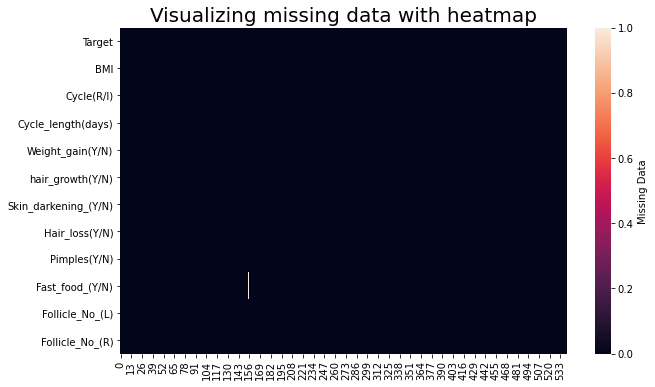

In [17]:
plt.figure(figsize=(10,6))
plt.title("Visualizing missing data with heatmap",fontsize=20)
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'Missing Data'})

There is missing value in 'Fast_food_(Y/N)'.

In [18]:
#replacing missing values with mode since 'Fast_food_(Y/N)' is a categorical variable
df["Fast_food_(Y/N)"]=df["Fast_food_(Y/N)"].fillna(df["Fast_food_(Y/N)"].mode()[0])

In [19]:
#recheking presence of missing values
df.isna().sum().sum()

0

### Duplicate value handling

In [20]:
#checking duplicated values
df.duplicated().any()

True

In [22]:
#accessing duplicated rows
df.loc[df.duplicated(), :]

,Target,BMI,Cycle(R/I),Cycle_length(days),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening_(Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Follicle_No_(L),Follicle_No_(R)
353,0,20.4,1,6,0,0,0,1,1,1.0,6,4


In [23]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)

In [24]:
#rechecking duplicates
df.duplicated().sum()

0

There are no duplicate values.

### outlier detection

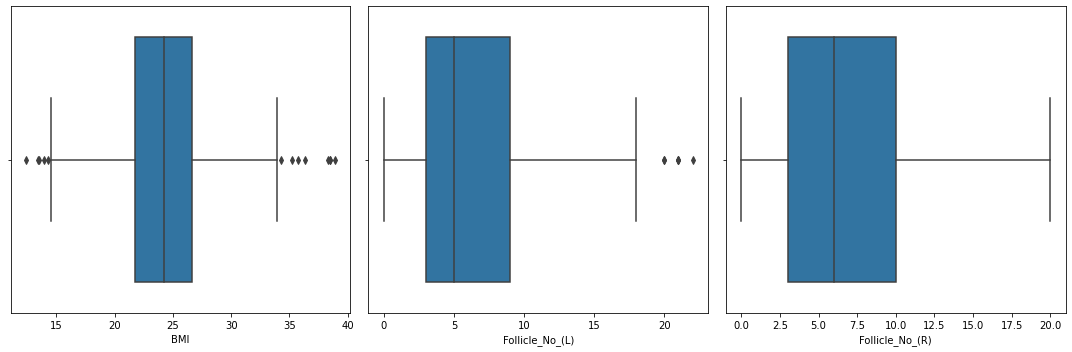

In [25]:
#boxplot for outlier detection of continuous variables
num_col= ['BMI','Follicle_No_(L)', 'Follicle_No_(R)']
plt.figure(figsize=(15, 5))
plt.title('Outlier Detection Using Boxplots',fontsize=20)
for i in range(0, len(num_col)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[num_col[i]],orient='v')
    plt.tight_layout()
plt.savefig('Outlier_detection.jpg')

We can see  outliers in columns 'BMI' and 'Follicle_No_(L)'. But they provide genuine infromation about the dataset. So we dont remove or replace them.

### EDA

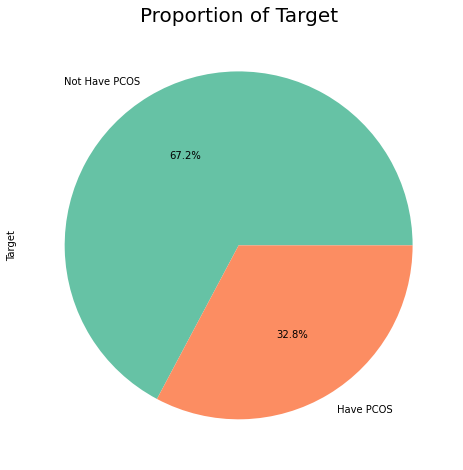

In [26]:
labels = ['Not Have PCOS','Have PCOS']
plt.title("Proportion of Target",fontsize=20)
color=sns.color_palette('Set2')
df["Target"].value_counts().plot(kind="pie",labels=labels,colors=color,autopct='%.1f%%',figsize=(8,8))
plt.savefig('Target_proportion.jpg')    

The dataset is imbalanced. We need to balance it.

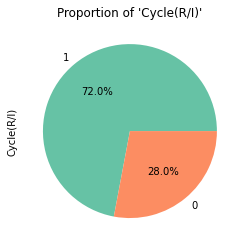

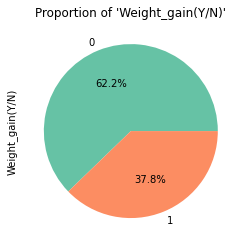

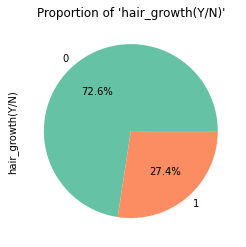

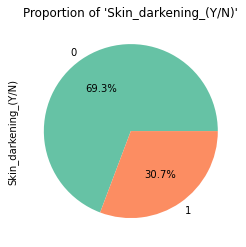

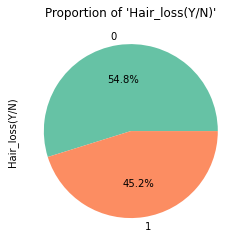

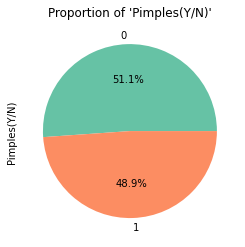

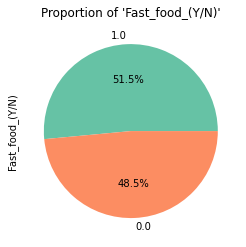

In [27]:
cat_col=df[['Cycle(R/I)','Weight_gain(Y/N)', 'hair_growth(Y/N)','Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)','Fast_food_(Y/N)']]
for i in cat_col:
    plt.figure(figsize=(5,5))
    color=sns.color_palette("Set2")
    plt.title("Proportion of '{}'".format(i))
    df[i].value_counts().plot(kind="pie",autopct='%.1f%%',colors=color,figsize=(4,4))
    plt.show()

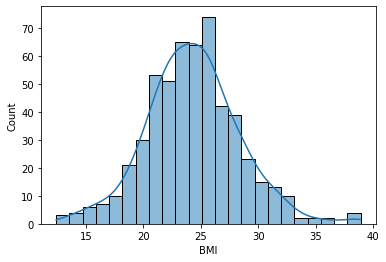

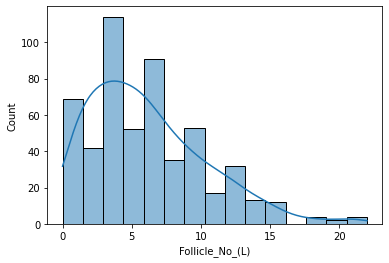

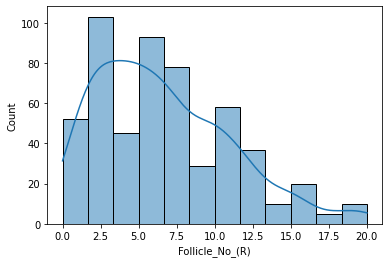

In [28]:
#distribution of continuous variables
cont_col=df[['BMI','Follicle_No_(L)','Follicle_No_(R)']]
for i in cont_col:
    sns.histplot( df[i], kde = True)
    plt.show()

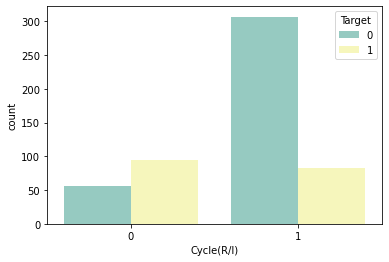

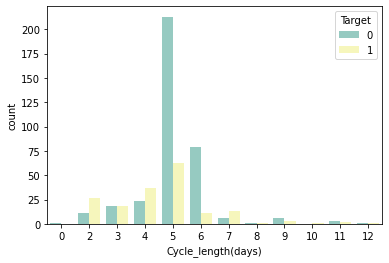

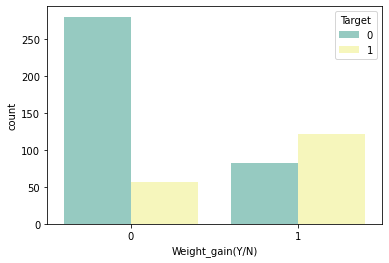

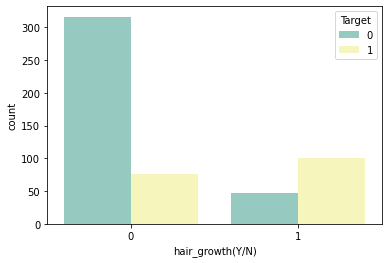

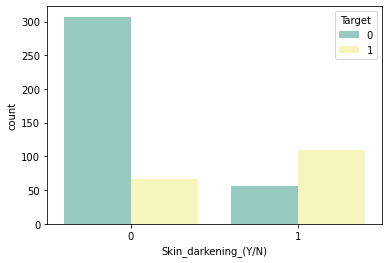

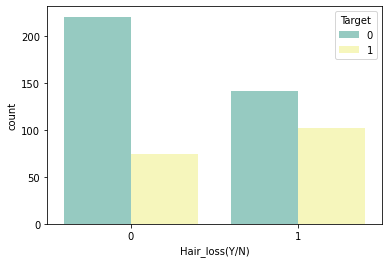

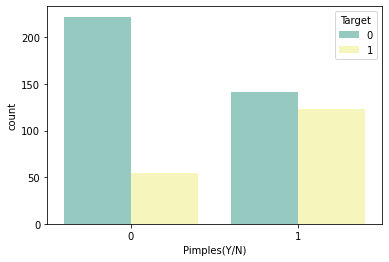

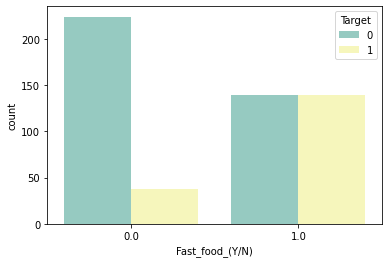

In [29]:
#count of features w.r.t 'Target'
col1=df[['Cycle(R/I)','Cycle_length(days)','Weight_gain(Y/N)', 'hair_growth(Y/N)', 'Skin_darkening_(Y/N)','Hair_loss(Y/N)', 'Pimples(Y/N)', 'Fast_food_(Y/N)']]
for i in col1:
    sns.countplot(df[i],hue=df['Target'],palette="Set3")
    plt.show()

* Irregular Menstrual cycle is associated with those who have PCOS and cycle is regular in non PCOS women.
* Weight gain, Hair loss, Body hair growth, Skin darkening and pimples are found more in PCOS affected.
* People who tend to eat fast food have PCOS than those who dont eat.
* Non PCOS women have an average of 6 days of cycle length.
* Cycle length more than 7 days is found usually in PCOS women.

### Bivariate

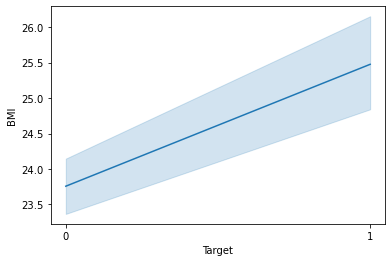

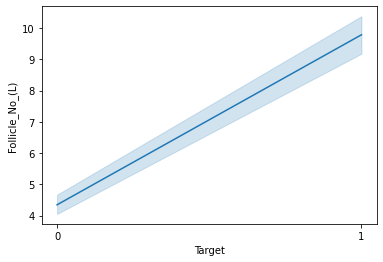

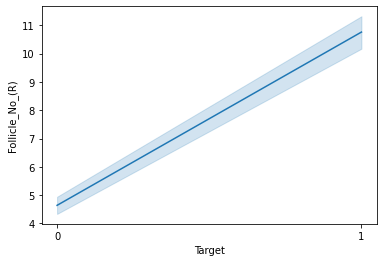

In [30]:
#line plot to plot the relationship between continuous variables with 'Target'
for i in cont_col:
    ax=sns.lineplot(df['Target'],df[i] )
    plt.xticks(np.arange(0,2,1))
    plt.show()

### Inference
* High BMI is found in PCOS patients.
* Follicle number of left and right ovary is very high in women with PCOS.

### Multivariate

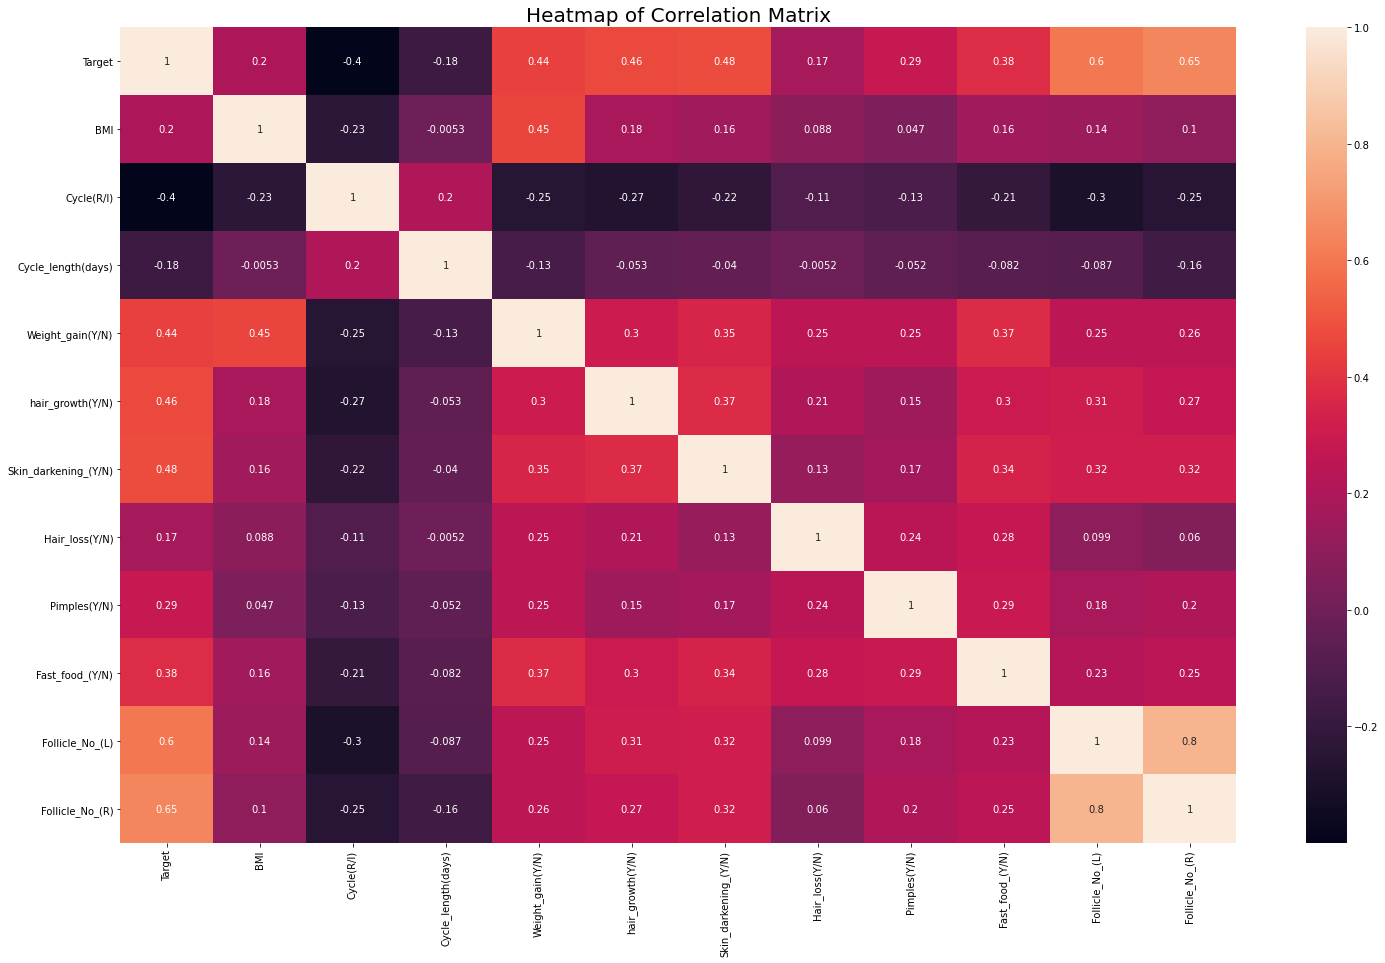

<Figure size 432x288 with 0 Axes>

In [31]:
corr= df.corr()
plt.figure(figsize=(25,15))
plt.title("Heatmap of Correlation Matrix",fontsize=20)
sns.heatmap(corr, annot = True)
plt.show()
plt.savefig('Correlation_heatmap.jpg')    

* 'Cycle(R/I)' and 'Cycle_length(days)' have low negative correlation with 'Target'.
* 'Follicle_No_(L)' and 'Follicle_No_(R)' has fair strong positive correlation with each other and have moderate positive correlation to 'Target'.

### Resampling

In [32]:
df["Target"].value_counts()

0    363
1    177
Name: Target, dtype: int64

In [33]:
#create two different dataframe of majority and minority class 
majority = df[(df['Target']==0)] 
minority = df[(df['Target']==1)] 
# upsample minority class
minority_upsampled = resample(minority, replace=True,n_samples= 363,random_state=42)
# Combine majority class with upsampled minority class
df_new = pd.concat([minority_upsampled, majority])

In [34]:
df_new["Target"].value_counts()

1    363
0    363
Name: Target, dtype: int64

The dataset has been balanced.

### Splitting dataset

In [35]:
x = df_new.drop("Target",axis=1)
y = df_new["Target"]

In [36]:
#splitting into x_train,x_test,y_train,y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model building

#### Logistic Regression

In [37]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [38]:
lg_pred=lg.predict(x_test)

In [39]:
lga=accuracy_score(y_test,lg_pred)
round(lga*100,2)

89.73

In [40]:
precision_score(y_test,lg_pred)

0.8928571428571429

In [41]:
recall_score(y_test,lg_pred)

0.9259259259259259

In [42]:
f1_score(y_test,lg_pred)

0.9090909090909091

In [43]:
target_names=['Not Have PCOS','Have PCOS']
print(classification_report(y_test,lg_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Have PCOS       0.90      0.86      0.88        65
    Have PCOS       0.89      0.93      0.91        81

     accuracy                           0.90       146
    macro avg       0.90      0.89      0.90       146
 weighted avg       0.90      0.90      0.90       146



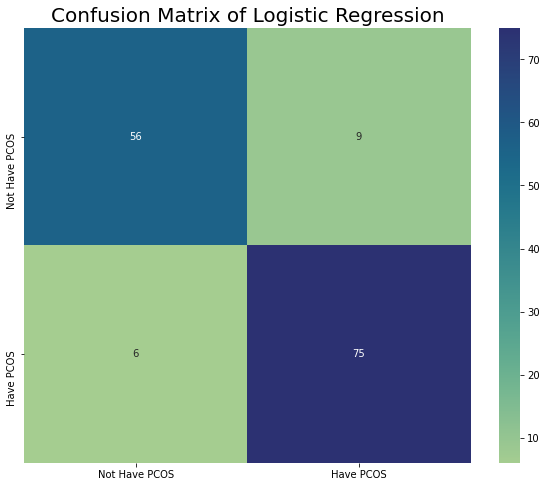

In [44]:
cm_LG=confusion_matrix(y_test,lg_pred)
cm_df_LG = pd.DataFrame(cm_LG, index=["Not Have PCOS", "Have PCOS"], columns=["Not Have PCOS","Have PCOS"])
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix of Logistic Regression",fontsize=20)
sns.heatmap(cm_df_LG, annot=True, fmt="d",cmap="crest")
plt.savefig('confusion_matric_lg.jpg')    

### Random Forest

In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
rf_pred=rf.predict(x_test)

In [47]:
rfa=accuracy_score(y_test,rf_pred)
round(rfa*100,2)

94.52

In [48]:
precision_score(y_test,rf_pred)

0.9294117647058824

In [49]:
recall_score(y_test,rf_pred)

0.9753086419753086

In [50]:
f1_score(y_test,rf_pred)

0.9518072289156626

In [51]:
print(classification_report(y_test,rf_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Have PCOS       0.97      0.91      0.94        65
    Have PCOS       0.93      0.98      0.95        81

     accuracy                           0.95       146
    macro avg       0.95      0.94      0.94       146
 weighted avg       0.95      0.95      0.94       146



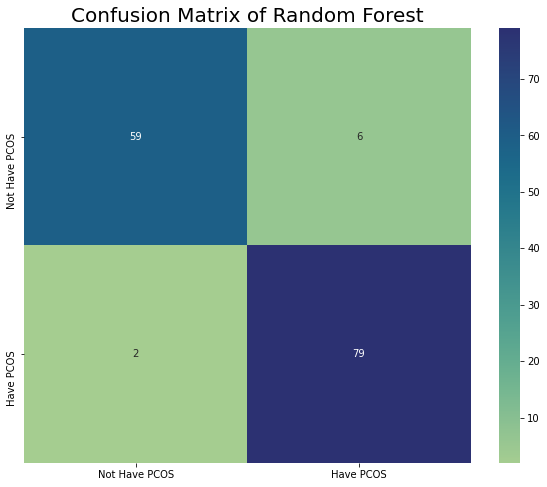

In [52]:
cm_RF=confusion_matrix(y_test,rf_pred)
cm_df_RF = pd.DataFrame(cm_RF, index=["Not Have PCOS", "Have PCOS"], columns=["Not Have PCOS","Have PCOS"])
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix of Random Forest",fontsize=20)
sns.heatmap(cm_df_RF, annot=True, fmt="d",cmap="crest")
plt.savefig('confusion_matric_rf.jpg')    

### KNN

In [53]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
kn_pred=kn.predict(x_test)

In [55]:
kna=accuracy_score(kn_pred,y_test)
round(kna*100,2)

89.04

In [56]:
precision_score(y_test,kn_pred)

0.891566265060241

In [57]:
f1_score(y_test,kn_pred)

0.9024390243902438

In [58]:
recall_score(y_test,kn_pred)

0.9135802469135802

In [59]:
print(classification_report(y_test,kn_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Have PCOS       0.89      0.86      0.88        65
    Have PCOS       0.89      0.91      0.90        81

     accuracy                           0.89       146
    macro avg       0.89      0.89      0.89       146
 weighted avg       0.89      0.89      0.89       146



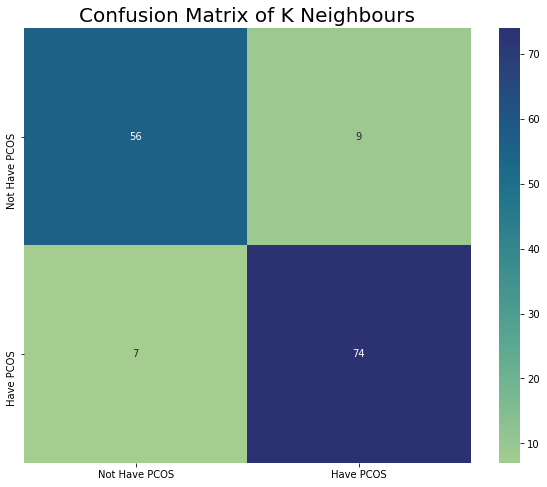

In [60]:
cm_KNN=confusion_matrix(y_test,kn_pred)
cm_df_KNN = pd.DataFrame(cm_KNN, index=["Not Have PCOS", "Have PCOS"], columns=["Not Have PCOS","Have PCOS"])
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix of K Neighbours",fontsize=20)
sns.heatmap(cm_df_KNN, annot=True, fmt="d",cmap="crest")
plt.savefig('confusion_matric_kn.jpg')    

### Decision Tree

In [61]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
dt_pred=dt.predict(x_test)

In [63]:
dta=accuracy_score(dt_pred,y_test)
round(dta*100,2)

89.04

In [64]:
precision_score(y_test,dt_pred)

0.8494623655913979

In [65]:
f1_score(y_test,dt_pred)

0.9080459770114943

In [66]:
recall_score(y_test,dt_pred)

0.9753086419753086

In [67]:
print(classification_report(y_test,dt_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Have PCOS       0.96      0.78      0.86        65
    Have PCOS       0.85      0.98      0.91        81

     accuracy                           0.89       146
    macro avg       0.91      0.88      0.89       146
 weighted avg       0.90      0.89      0.89       146



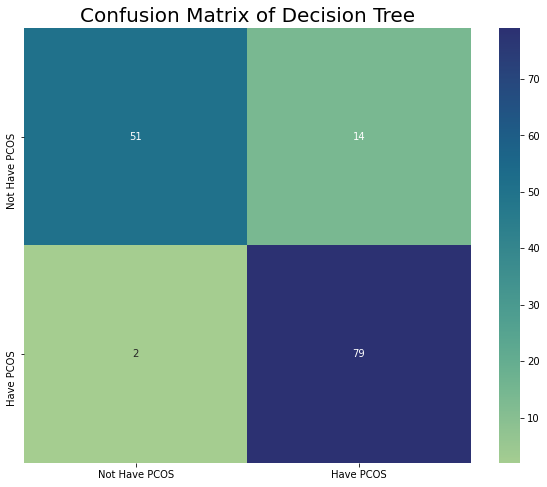

In [68]:
cm_DTC=confusion_matrix(y_test,dt_pred)
cm_df_DTC = pd.DataFrame(cm_DTC, index=["Not Have PCOS", "Have PCOS"], columns=["Not Have PCOS","Have PCOS"])
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix of Decision Tree",fontsize=20)
sns.heatmap(cm_df_DTC, annot=True, fmt="d",cmap="crest")
plt.savefig('confusion_matric_dt.jpg')    

Random forest is the best model with high accuracy, precision, recall and F1 score.

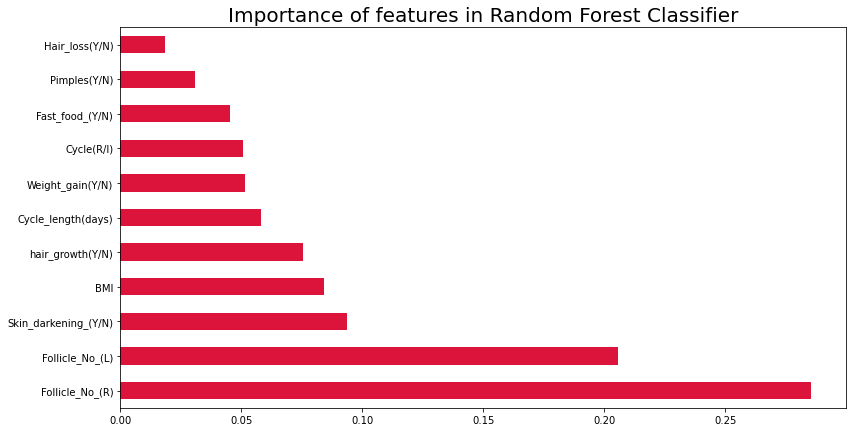

In [70]:
X = df_new.drop("Target",axis=1)
feat_importances =pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh',color="crimson",figsize=(13,7))
plt.title("Importance of features in Random Forest Classifier",fontsize=20)
plt.savefig('Importance of features in Random Forest Classifier.jpg')    

Follicle_no(R) and Follicle_No_(L) are the most important features.